In [85]:
import os
import requests
import json
#from config import g_keys
from pprint import pprint
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [86]:
file = os.path.join( "Output_data", "scatterplot_data.csv")
scatter_df = pd.read_csv(file)


#Import to scaterplot_data

scatter_df.head()

,tx_tot,day,ny_tot,tx_%_pos,ny_%_pos
0,1,304,54,100.0,11.111111
1,1,305,98,100.0,22.448980
2,5,306,125,100.0,26.400000
3,8,307,168,100.0,45.238095
4,8,308,197,100.0,53.299492


In [140]:
# Day on x_axis total tested on y_axis with %_pos for size
tx_pos = (scatter_df["tx_%_pos"]/100).to_numpy()
ny_pos = (scatter_df["ny_%_pos"]/100).to_numpy()
x_limit = scatter_df["day"].count()


201 201


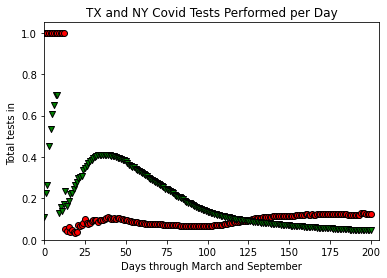

In [142]:
# X_axis
plt.xlim(0, 205)
x_axis = np.arange(0,x_limit,1)

# Y_axis
plt.ylim(0, 1.05)

#Create Labels
plt.title("TX and NY Covid Tests Performed per Day")
plt.xlabel("Days through March and September")
plt.ylabel("Total tests in TX and NY")

# Scatterplot
plt.scatter(x=x_axis, y=tx_pos, marker="o", facecolors="red", edgecolors="black")
plt.scatter(x=x_axis, y=ny_pos, marker="v", facecolors="green", edgecolors="black")

In [233]:
output_path = os.path.join("Images","TX and NY % Pos Covid Scatter by day")
plt.savefig(output_path)

<Figure size 432x288 with 0 Axes>

In [168]:
file = os.path.join( "Output_data", "% positive tests by month.csv")
line_df = pd.read_csv(file)
line_df.head()

,month,ave_tx_pos_test,ave_ny_pos_test,tot_tx_test,tot_ny_test,avg_per_pos_tx,avg_per_pos_ny
0,Mar,608.107143,16351.42857,8.431357e+03,5.225786e+04,0.072,0.313
1,Apr,15842.400000,207614.76670,1.666578e+05,5.430857e+05,0.095,0.382
2,May,46150.419350,344950.67740,6.343455e+05,1.411822e+06,0.073,0.244
3,Jun,99949.566670,383783.06670,1.361634e+06,3.024553e+06,0.073,0.127
4,Jul,294238.677400,404663.00000,2.752856e+06,4.925164e+06,0.107,0.082


In [195]:
# Create values for Tx and NY % over month
tx_pos = line_df["avg_per_pos_tx"].to_numpy()
ny_pos = line_df["avg_per_pos_ny"].to_numpy()
x_limit = line_df["month"].count()
y_limit = line_df["avg_per_pos_ny"].max()
x_labels = line_df["month"].astype("string").to_numpy()
time=np.arange(0,x_limit+1,1)

#Helps make graph user friendly by creating a start from 0 point
tx_pos = np.insert(tx_pos,0,0)
ny_pos = np.insert(ny_pos,0,0)
x_labels = np.insert(x_labels,0,"Origin")

print(x_labels,time,tx_pos)

['Origin' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep'] [0 1 2 3 4 5 6 7] [0.    0.072 0.095 0.073 0.073 0.107 0.122 0.123]


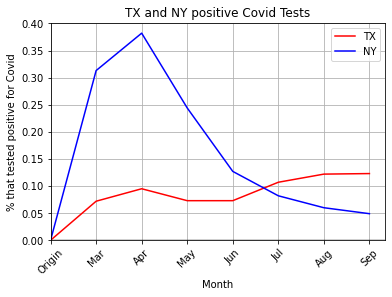

In [196]:
#Create Labels
plt.title("TX and NY positive Covid Tests")
plt.xlabel("Month")
plt.ylabel("% that tested positive for Covid")

# set labels for the x-axis
plt.xticks(time, x_labels, rotation=45)

#Format plot
plt.xlim(0,x_limit*1.05)
plt.ylim(0,y_limit*1.05)
plt.hlines(0,0,10, alpha=0.25)

#Plot graph
tx = plt.plot(time, tx_pos, color='red',label="TX")
ny = plt.plot(time, ny_pos, color='blue', label="NY")

plt.legend(handles=[tx[0],ny[0]],loc="best")
    

#Gridlines
plt.grid()

In [200]:
output_path = os.path.join("Images","TX & NY % Pos Covid line by month")
plt.savefig(output_path)

<Figure size 432x288 with 0 Axes>

In [201]:
file = os.path.join( "Output_data", "% positive tests by month.csv")
bar_df = pd.read_csv(file)


#Import for linechart
bar_df.head()

,month,ave_tx_pos_test,ave_ny_pos_test,tot_tx_test,tot_ny_test,avg_per_pos_tx,avg_per_pos_ny
0,Mar,608,16351,8431,52258,0.072,0.313
1,Apr,15842,207615,166658,543086,0.095,0.382
2,May,46150,344951,634345,1411822,0.073,0.244
3,Jun,99950,383783,1361635,3024553,0.073,0.127
4,Jul,294239,404663,2752856,4925164,0.107,0.082


In [202]:
# Bar Chart to compare total performed each month
tx_tot = line_df["tot_tx_test"].to_numpy()
ny_tot = line_df["tot_ny_test"].to_numpy()
y_limit = line_df["tot_ny_test"].max()
x_labels = line_df["month"].astype("string").to_numpy()
x_limit = line_df["month"].count()
x_axis = np.arange(0,x_limit,1)

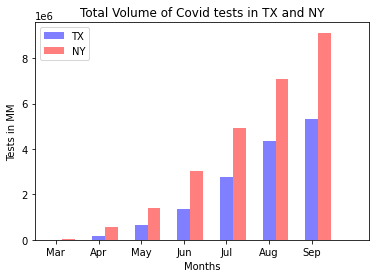

In [231]:
#Create labels
plt.title("Total Volume of Covid tests in TX and NY")
plt.xlabel("Months")
plt.ylabel("Tests in MM")

width = 0.3

#Plot Chart
tx = plt.bar(x=x_axis,height=tx_tot,color='blue', width=width, label="TX", alpha=.5,align="center")
ny = plt.bar(x=(x_axis+width),height=ny_tot,color='red', width=width, label="NY", alpha=.5,align="center")

plt.xticks(x_axis,x_labels)
plt.xlim(-.5, x_limit*1.05)
plt.ylim(0,y_limit*1.05)

plt.legend(loc='best')

In [232]:
output_path = os.path.join("Images","TX & NY Total Covid tests by Month")
plt.savefig(output_path)

<Figure size 432x288 with 0 Axes>